TesseractNotFoundError: C:\Program Files (x86)\Tesseract-OCR\tesseract.exe is not installed or it's not in your PATH. See README file for more information.

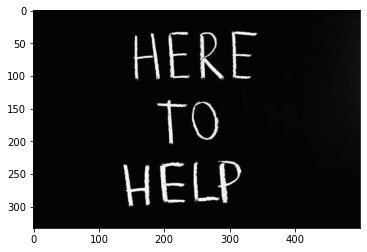

In [6]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'


img = cv2.imread("Test.jpeg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
contours, hierarchy = cv2.findContours(dilation,
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_NONE)

im2 = img.copy()

file = open("recognized.txt", "w+")
file.write("")
file.close()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cropped = im2[y:y + h, x:x + w]
    file = open("recognized.txt", "a")
    config = ('-l eng --oem 1 --psm 3')
    text = pytesseract.image_to_string(cropped,config=config)
    print(text)
    file.read(text)
    file.close()